In [41]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [42]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

house_prices.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [46]:
house_prices.isnull().sum()*100/house_prices.isnull().count()

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage       0.000000
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.000000
exterqual         0.000000
extercond         0.000000
foundation        0.000000
                   ...    
bedroomabvgr      0.000000
kitchenabvgr      0.000000
kitchenqual       0.000000
totrmsabvgrd      0.000000
functional        0.000000
fireplaces        0.000000
f

In [40]:
house_prices[house_prices['lotfrontage'].isna()].head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,None,IR2,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,None,IR1,Lvl,AllPub,...,0,None,GdWo,None,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,5,2010,WD,Normal,154000


In [44]:
house_prices['masvnrarea'].fillna(0, inplace=True)

In [ ]:
house_prices["lotfrontage"].fillna(house_prices["lotfrontage"].mean(), inplace=True)

Text(0.5, 1.0, 'correlation matrix (Houses Prices)')

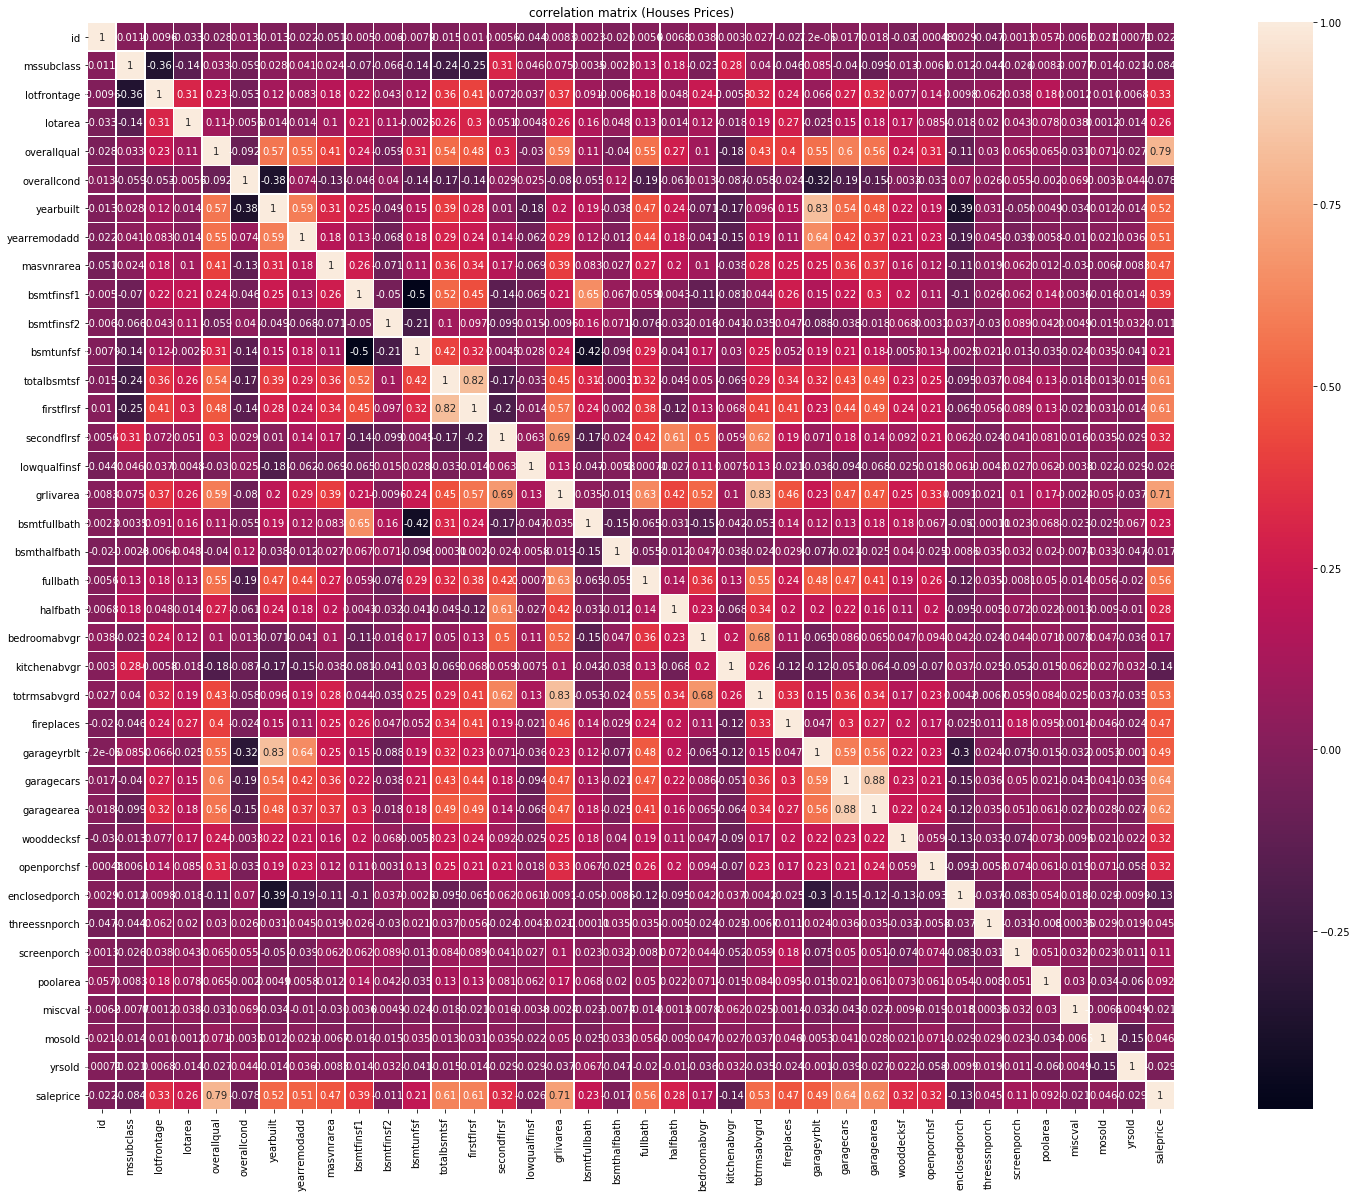

In [54]:
import seaborn as sns
corrmat_house = house_prices.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corrmat_house, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Houses Prices)")

the choosen features are:

- street (Type of access road, paved or gravel) (Nominal Categoical)

- centralair (availability of central air condition, yes or no) (Nominal Categorical)

- overallqual (Overall material and finish quality, scale from 1-10) (Continuous)

- grlivarea (above grade living area in square feet) (Continuous)

Text(0.5, 1.0, 'overallqual')

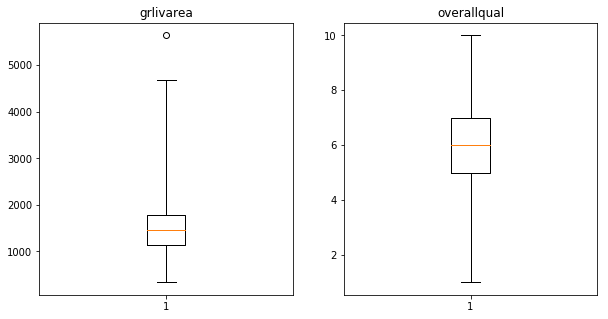

In [69]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.boxplot(house_prices["grlivarea"], whis = 5)
plt.title('grlivarea')

plt.subplot(1,2,2)
plt.boxplot(house_prices['overallqual'], whis = 5)
plt.title('overallqual')

In [70]:
house_prices["grlivarea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: grlivarea, dtype: float64

Only one outlier, I would go with dropping the row with that value

In [71]:
house_prices = house_prices[house_prices.grlivarea != 5642]

Text(0.5, 1.0, 'grlivarea')

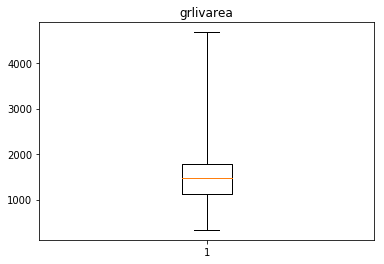

In [72]:
plt.boxplot(house_prices["grlivarea"], whis = 5)
plt.title('grlivarea')

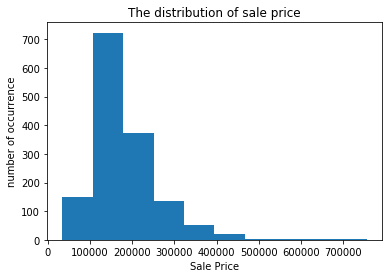

In [14]:
plt.hist(house_prices.saleprice)
plt.title("The distribution of sale price")
plt.xlabel("Sale Price")
plt.ylabel("number of occurrence")
plt.show()

Text(0.5, 1.0, 'relationship between living room area and sale price')

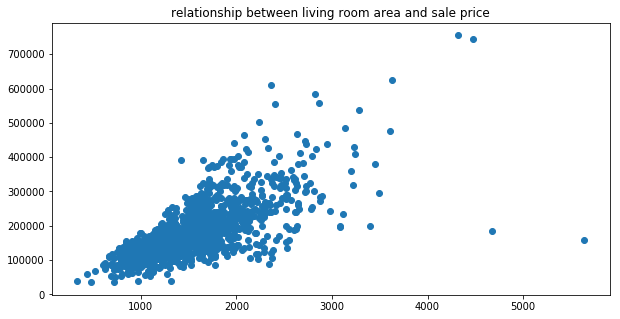

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(house_prices["grlivarea"], house_prices["saleprice"])
plt.title("relationship between living room area and sale price")

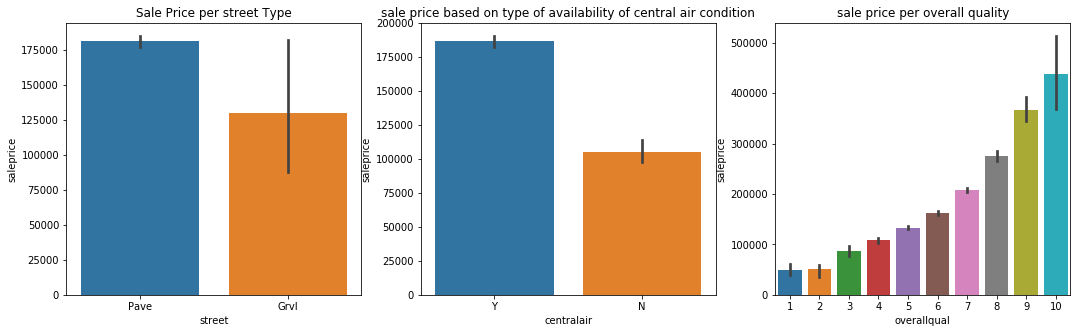

In [62]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
# draw the heatmap using seaborn.
sns.barplot(house_prices["street"], house_prices["saleprice"])
plt.title("Sale Price per street Type")

plt.subplot(1,3,2)
# draw the heatmap using seaborn.
sns.barplot(house_prices["centralair"], house_prices["saleprice"])
plt.title("sale price based on type of availability of central air condition")

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(house_prices["overallqual"], house_prices["saleprice"])
plt.title("sale price per overall quality")

plt.show()

In [84]:
house_prices["street"].describe()

count     1459
unique       2
top       Pave
freq      1453
Name: street, dtype: object

In [85]:
house_prices["centralair"].describe()

count     1459
unique       2
top          Y
freq      1364
Name: centralair, dtype: object

Both of these two features ("street") and("centralair") are extremly imbalanced. 99.59% of the street were paved leaving only less than 0.5% gravel. The situation of ("centralair") values are less imbalanced where 93.78 of the houses have central air condition and slightly more than 6% does not have it. 

Due to the extreme imbalance of "street" feature values, this variable will not be concedred to build the model. and due to the imbalance of "centralair" air values and the low importance of this feature, this feature will be discarded too.

The model will be built using "grlivarea" and "overallqual" variables only

In [86]:
Y = house_prices['saleprice']
X = house_prices[['grlivarea', 'overallqual']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [   60.81190923 32290.24433252]

Intercept: 
 -107912.75409850894


The model is:

Sale price = -107912 + 60.81(grliyarea) + 32290.24(overallqual)